In [1]:
# ----------------------------------------------------------------------
# Created: 2020-09-12
# Last-Updated: 
# Filename: interval_estimation.ipynb
# Author: Yinan Yu
# Description:  
# If you have any questions or comments, email yinan@chalmers.se or 
# yinan.yu@asymptotic.ai
# Note: the content of this file is subject to change
# ----------------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import os
plt.style.use('seaborn-darkgrid')

data_dir = "../../data/"

# Uncertainty for parameter estimations

## Standardization and the z-table

Mean value and standard deviation: 23.33, 22.18
Sample mean and sample standard deviation: 23.21, 22.16


(-40.0, 80.0)

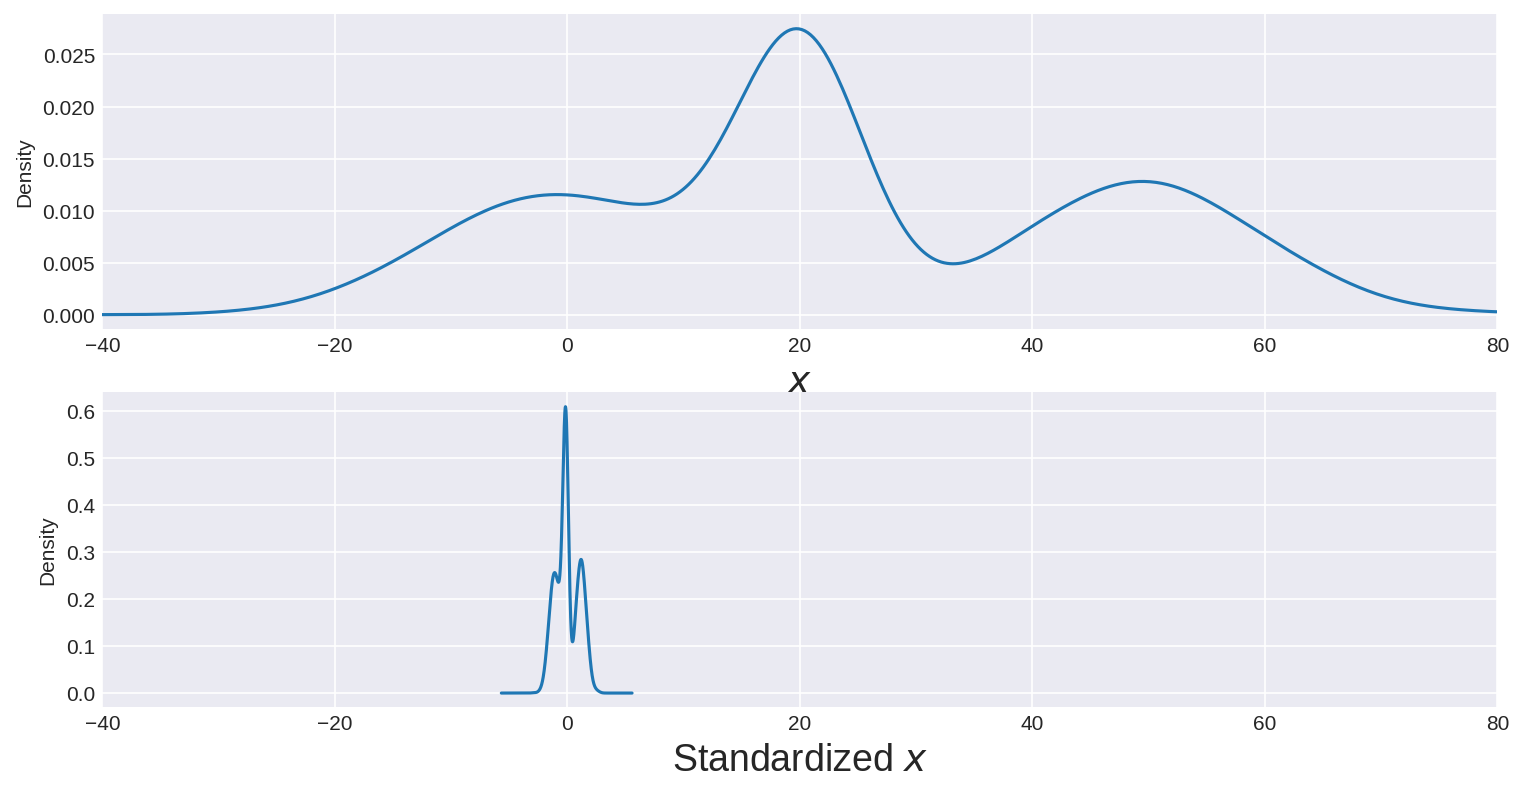

In [2]:
# Standardization
N = 1000
xmin = -40
xmax = 80
fig, axes = plt.subplots(2, 1, figsize=(12, 6), dpi=150)

mean1, mean2, mean3 = 20, 50, 0
std1, std2, std3 = 3, 10, 10
x0 = stats.norm.rvs(mean1, std1, N)
x1 = stats.norm.rvs(mean2, std2, N)
x2 = stats.norm.rvs(mean3, std3, N)
x = pd.DataFrame(np.concatenate((x0, x1, x2)))
x.plot.kde(ax=axes[0], legend=False)
axes[0].set_xlabel("$x$", fontsize=18)
axes[0].set_xlim(xmin, xmax)
x_mean = 1/3*sum([mean1, mean2, mean3])
x_std = math.sqrt(1/3*sum([mean1*mean1+std1*std1, 
                 mean2*mean2+std2*std2,
                 mean3*mean3+std3*std3]) - x_mean*x_mean)
print("Mean value and standard deviation: %.2f, %.2f"%(x_mean, x_std))
print("Sample mean and sample standard deviation: %.2f, %.2f"%(x.mean(), x.std()))
x_standardized = (x - x_mean)/x_std
x_standardized.plot.kde(ax=axes[1], legend=False)
axes[1].set_xlabel("Standardized $x$", fontsize=18)
axes[1].set_xlim(xmin, xmax)


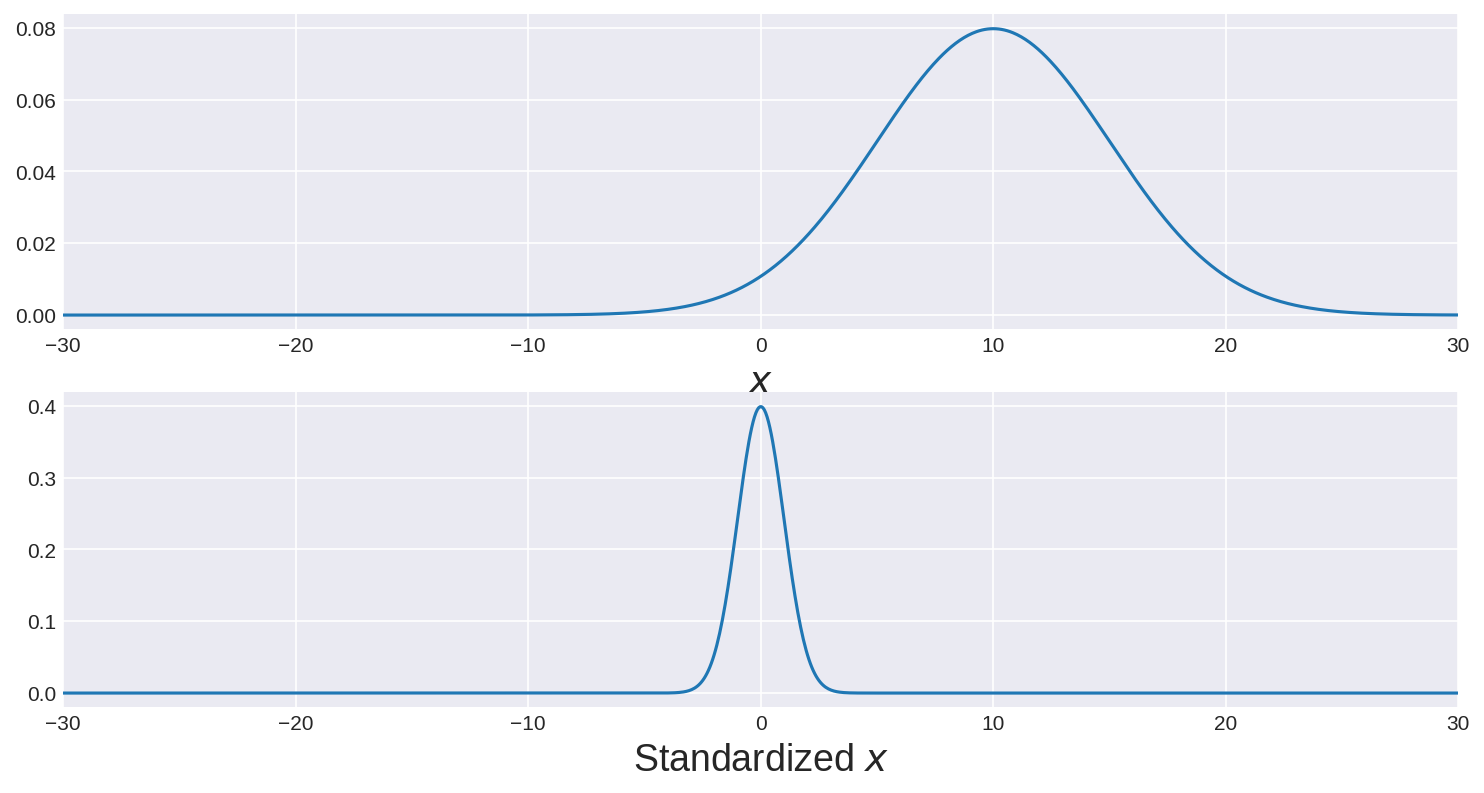

In [3]:
# Standardization of Gaussian
N = 1000
xmin = -30
xmax = 30
fig, axes = plt.subplots(2, 1, figsize=(12, 6), dpi=150)

mean = 10
std = 5
x = np.linspace(xmin, xmax, num=N)
pdf = stats.norm.pdf(x, mean, std)
axes[0].plot(x, pdf)
axes[0].set_xlabel("$x$", fontsize=18)
axes[0].set_xlim(xmin, xmax)
x_standardized = np.linspace(xmin, xmax, num=N)
pdf_standardized = stats.norm.pdf(x_standardized, 0, 1)
axes[1].plot(x_standardized, pdf_standardized)
axes[1].set_xlabel("Standardized $x$", fontsize=18)
axes[1].set_xlim(xmin, xmax);

In [4]:
std = 1.8
N = 30
alpha = 0.05
confidence_level = 1 - alpha
q0 = stats.norm.ppf(alpha/2, 0, std/math.sqrt(N))
q1 = stats.norm.ppf(confidence_level+alpha/2, 0, std/math.sqrt(N))
print(q0, q1)

# Standardization
std = 1.8
N = 30
alpha = 0.05
confidence_level = 1 - alpha # 95% confidence level
z0 = stats.norm.ppf(alpha/2,
                    0, 1)
z1 = stats.norm.ppf(confidence_level+alpha/2,
                    0, 1)
print(z0*std/math.sqrt(N), z1*std/math.sqrt(N))


-0.6441098917381767 0.6441098917381766
-0.6441098917381767 0.6441098917381766


1.959963984540054


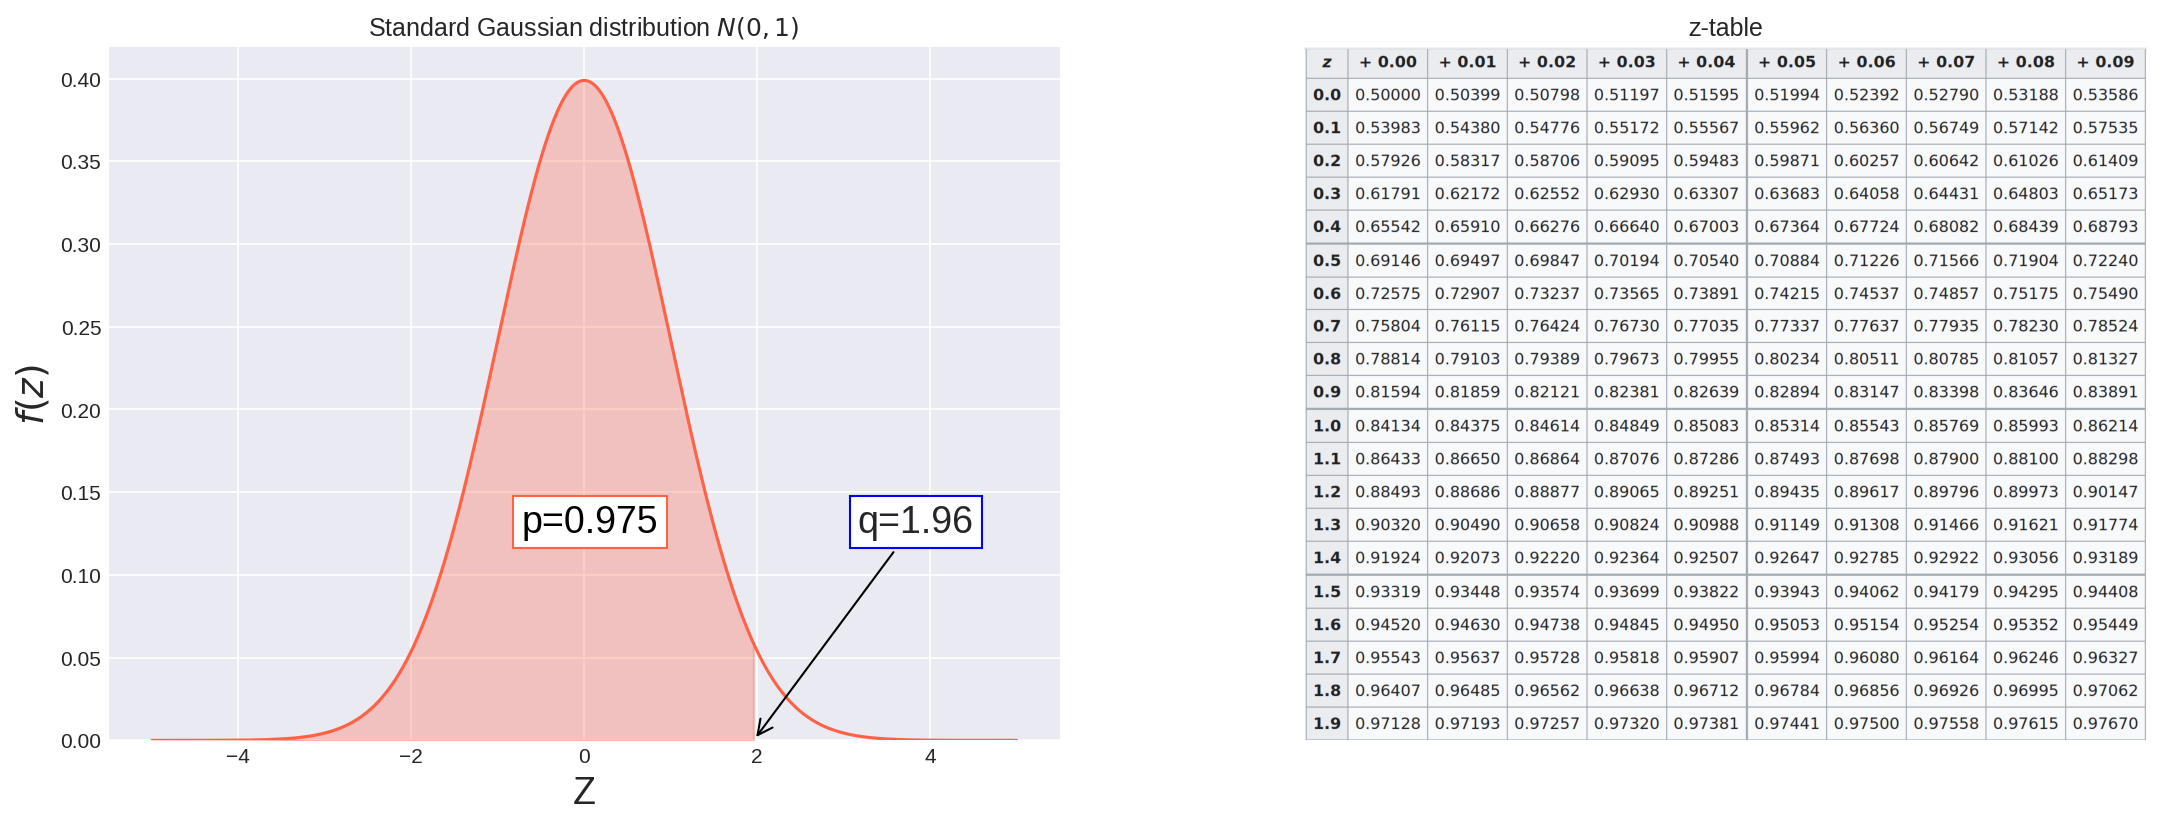

In [5]:
# Standard Gaussian distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=150) 
ztable = plt.imread(os.path.join(data_dir, "z-table.png"))
x = np.linspace(-5, 5, num=1000)
pdf = stats.norm.pdf(x, 0, 1)
p = 0.975
q = stats.norm.ppf(p, 0, 1)
axes[0].fill_between(x[x<=q], pdf[x<=q], color="tomato", alpha=0.3)
print(q)
axes[0].annotate("p=0.975", (0, 0), 
            xytext=(-30, 100), 
            textcoords="offset points", 
            color="k", fontsize=18, bbox=dict(edgecolor="tomato", facecolor="white"))
axes[0].annotate("q=1.96", (1.96, 0), 
            xytext=(50, 100), 
            textcoords="offset points", 
            arrowprops={"arrowstyle":"->"}, fontsize=18, 
            bbox=dict(edgecolor="blue", facecolor="white"));

axes[0].plot(x, pdf, c="tomato")
axes[0].set_title("Standard Gaussian distribution $N(0,1)$")
axes[0].set_xlabel("Z", fontsize=18);
axes[0].set_ylabel("$f(z)$", fontsize=18);
axes[0].set_ylim(0);

axes[1].imshow(ztable)
axes[1].set_title("z-table")
axes[1].get_xaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)

1.959963984540054
1.959963984540054


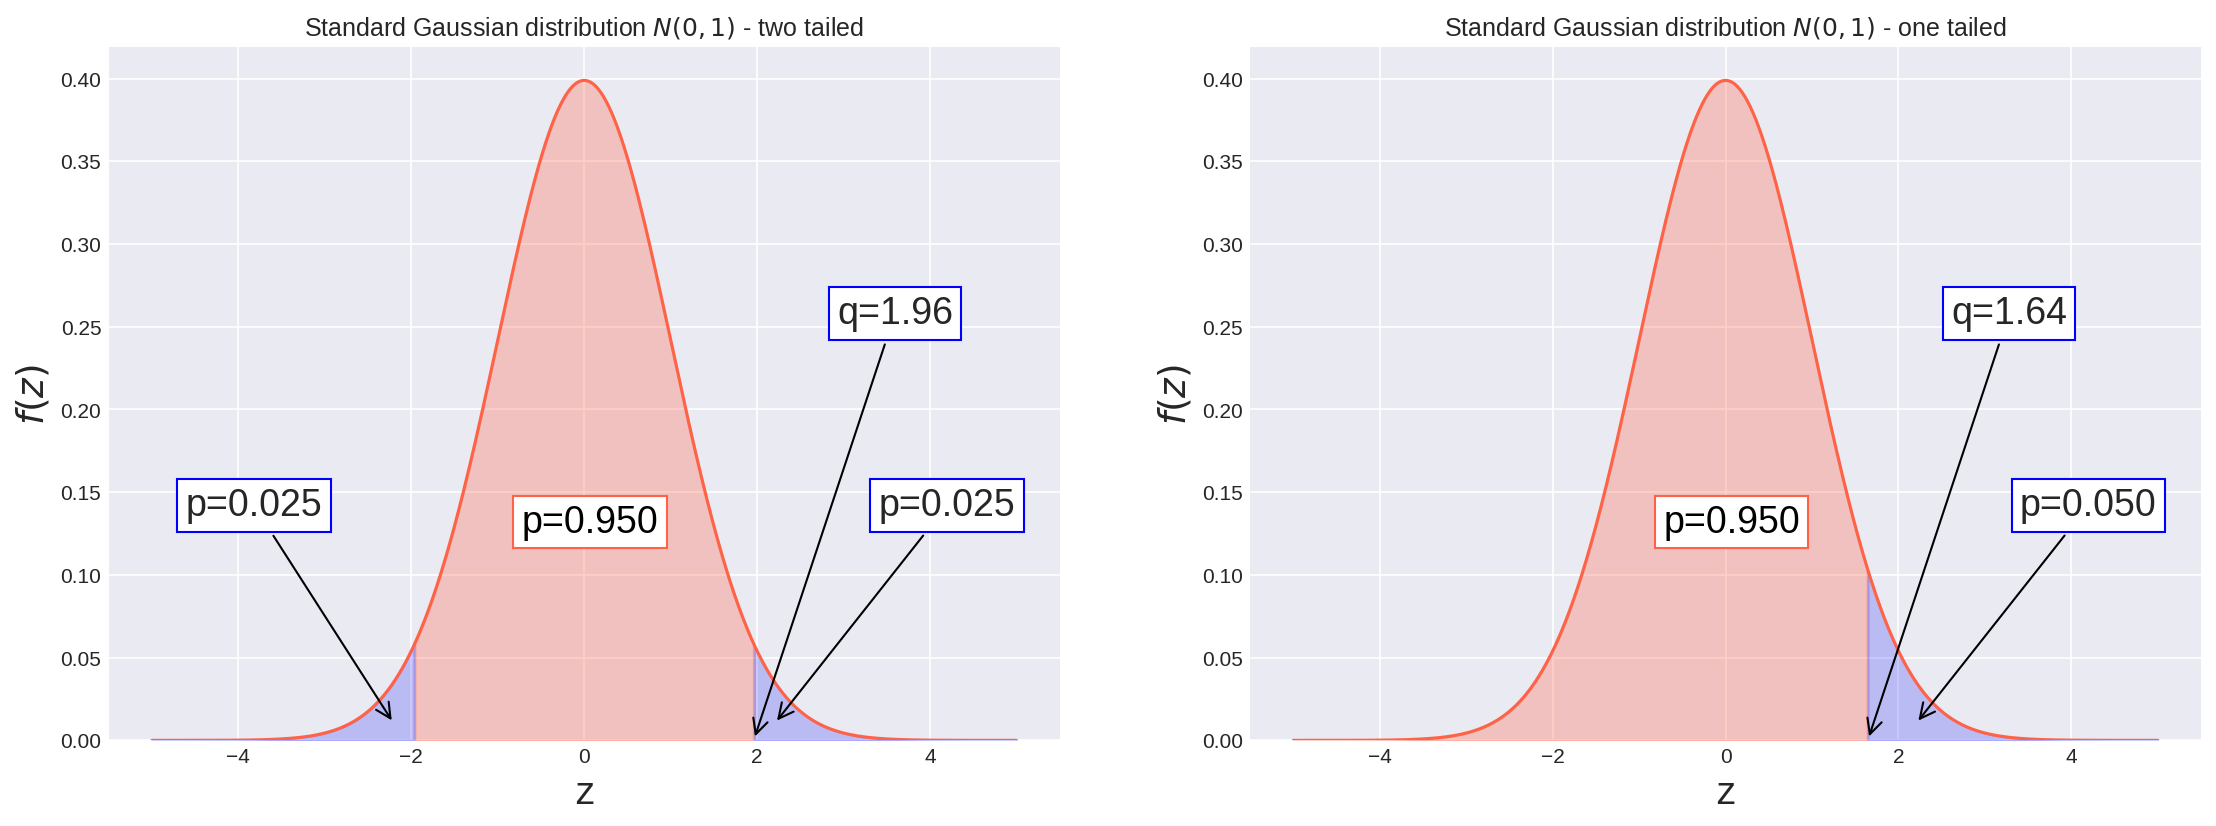

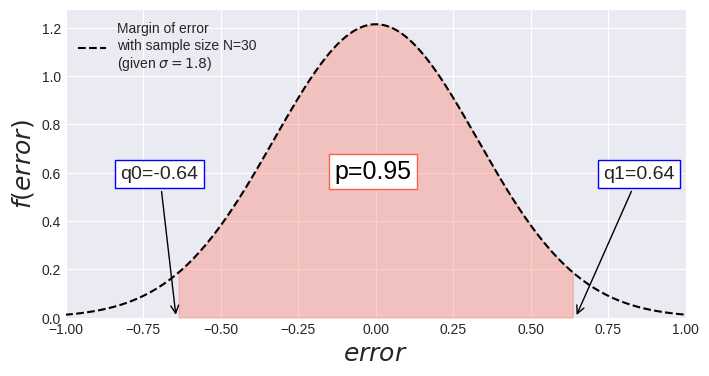

In [6]:
# Gaussian distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=150) 
xmin, xmax = -5, 5
x = np.linspace(xmin, xmax, num=1000)
pdf = stats.norm.pdf(x, 0, 1)
p0 = 0.025
p1 = 0.975
cl = 1-2*p0
q0 = stats.norm.ppf(p0, 0, 1)
q1 = stats.norm.ppf(p1, 0, 1)
axes[0].fill_between(x[(x<=q1) & (x>=q0)], pdf[(x<=q1) & (x>=q0)], 
                     color="tomato", alpha=0.3)
axes[0].fill_between(x[(x<=q0)], 
                     pdf[(x<=q0)], 
                     color="blue", alpha=0.2)
axes[0].fill_between(x[(x>=q1)], 
                     pdf[(x>=q1)], 
                     color="blue", alpha=0.2)
print(q)
axes[0].annotate("p=%.3f"%cl, (0, 0), 
            xytext=(-30, 100), 
            textcoords="offset points", 
            color="k", fontsize=18, bbox=dict(edgecolor="tomato", facecolor="white"))
axes[0].annotate("p=%.3f"%p0, (2.2, 0.01), 
            xytext=(50, 100), 
            textcoords="offset points", 
            arrowprops={"arrowstyle":"->"}, fontsize=18, 
            bbox=dict(edgecolor="blue", facecolor="white"))
axes[0].annotate("p=%.3f"%p0, (-2.2, 0.01), 
            xytext=(-100, 100), 
            textcoords="offset points", 
            arrowprops={"arrowstyle":"->"}, fontsize=18, 
            bbox=dict(edgecolor="blue", facecolor="white"))
axes[0].annotate("q=%.2f"%q1, (q1, 0), 
            xytext=(40, 200), 
            textcoords="offset points", 
            arrowprops={"arrowstyle":"->"}, fontsize=18, 
            bbox=dict(edgecolor="blue", facecolor="white"))

axes[0].plot(x, pdf, c="tomato")
axes[0].set_title("Standard Gaussian distribution $N(0,1)$ - two tailed")
axes[0].set_xlabel("z", fontsize=18);
axes[0].set_ylabel("$f(z)$", fontsize=18);
axes[0].set_ylim(0);

p1 = 0.95
pe = 1 - p1
cl = p1
q1 = stats.norm.ppf(p1, 0, 1)
axes[1].fill_between(x[(x<=q1)], 
                     pdf[(x<=q1)], 
                     color="tomato", alpha=0.3)
axes[1].fill_between(x[(x>=q1)], 
                     pdf[(x>=q1)], 
                     color="blue", alpha=0.2)
print(q)
axes[1].annotate("p=%.3f"%cl, (0, 0), 
            xytext=(-30, 100), 
            textcoords="offset points", 
            color="k", fontsize=18, bbox=dict(edgecolor="tomato", facecolor="white"))
axes[1].annotate("p=%.3f"%pe, (2.2, 0.01), 
            xytext=(50, 100), 
            textcoords="offset points", 
            arrowprops={"arrowstyle":"->"}, fontsize=18, 
            bbox=dict(edgecolor="blue", facecolor="white"))
axes[1].annotate("q=%.2f"%q1, (q1, 0), 
            xytext=(40, 200), 
            textcoords="offset points", 
            arrowprops={"arrowstyle":"->"}, fontsize=18, 
            bbox=dict(edgecolor="blue", facecolor="white"))

axes[1].plot(x, pdf, c="tomato")
axes[1].set_title("Standard Gaussian distribution $N(0,1)$ - one tailed")
axes[1].set_xlabel("z", fontsize=18);
axes[1].set_ylabel("$f(z)$", fontsize=18);
axes[1].set_ylim(0);

_, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=100)
mu = 2
std = 1.8
N = 30
pdf_x_bar = stats.norm.pdf(x, mu, math.sqrt(math.pow(std,2)/N))
pdf_error = stats.norm.pdf(x, 0, math.sqrt(math.pow(std,2)/N))
# ax.plot(x, pdf_x_bar, c="tomato", label=r"Sample mean $\bar{X}$ with sample size 30")
ax.plot(x, pdf_error, c="k", linestyle="--", label="Margin of error \nwith sample size N=30 \n(given $\sigma=1.8$)")
p1 = 0.975
p0 = 1 - p1
cl = p1-p0
q0 = stats.norm.ppf(p0, 0, math.sqrt(math.pow(std,2)/N))
q1 = stats.norm.ppf(p1, 0, math.sqrt(math.pow(std,2)/N))
ax.annotate("q0=%.2f"%q0, (q0, 0), 
            xytext=(-40, 100), 
            textcoords="offset points", 
            arrowprops={"arrowstyle":"->"}, fontsize=14, 
            bbox=dict(edgecolor="blue", facecolor="white"))
ax.annotate("q1=%.2f"%q1, (q1, 0), 
            xytext=(20, 100), 
            textcoords="offset points", 
            arrowprops={"arrowstyle":"->"}, fontsize=14, 
            bbox=dict(edgecolor="blue", facecolor="white"))

ax.fill_between(x[(x<=q1) & (x>=q0)], 
                  pdf_error[(x<=q1) & (x>=q0)], 
                  color="tomato", alpha=0.3)
ax.annotate("p=%.2f"%cl, (0, 0), 
            xytext=(-30, 100), 
            textcoords="offset points", 
            color="k", fontsize=18, bbox=dict(edgecolor="tomato", facecolor="white"))
ax.set_title("")
ax.set_xlabel(r"${error}$", fontsize=18)
ax.set_ylabel(r"$f({error})$", fontsize=18)
ax.set_ylim(0)
ax.set_xlim(-1, 1)
ax.legend(loc="upper left");




(-5.0, 5.0)

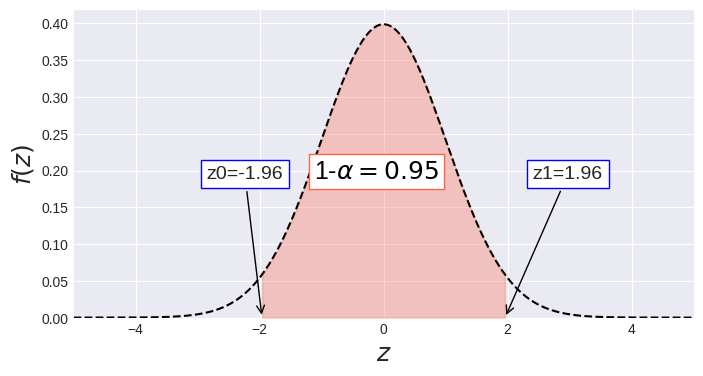

In [7]:
_, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=100)
x = np.linspace(-5, 5, num=1000)
pdf_error = stats.norm.pdf(x, 0, 1)
# ax.plot(x, pdf_x_bar, c="tomato", label=r"Sample mean $\bar{X}$ with sample size 30")
ax.plot(x, pdf_error, c="k", linestyle="--")
p1 = 0.975
p0 = 1 - p1
cl = p1-p0
q0 = stats.norm.ppf(p0, 0, 1)
q1 = stats.norm.ppf(p1, 0, 1)
ax.annotate("z0=%.2f"%q0, (q0, 0), 
            xytext=(-40, 100), 
            textcoords="offset points", 
            arrowprops={"arrowstyle":"->"}, fontsize=14, 
            bbox=dict(edgecolor="blue", facecolor="white"))
ax.annotate("z1=%.2f"%q1, (q1, 0), 
            xytext=(20, 100), 
            textcoords="offset points", 
            arrowprops={"arrowstyle":"->"}, fontsize=14, 
            bbox=dict(edgecolor="blue", facecolor="white"))

ax.fill_between(x[(x<=q1) & (x>=q0)], 
                  pdf_error[(x<=q1) & (x>=q0)], 
                  color="tomato", alpha=0.3)
ax.annotate(r"1-$\alpha=%.2f$"%cl, (0, 0), 
            xytext=(-50, 100), 
            textcoords="offset points", 
            color="k", fontsize=18, bbox=dict(edgecolor="tomato", facecolor="white"))
ax.set_title("")
ax.set_xlabel(r"${z}$", fontsize=18)
ax.set_ylabel(r"$f({z})$", fontsize=18)
ax.set_ylim(0)
ax.set_xlim(-5, 5)


## Different types of z-table

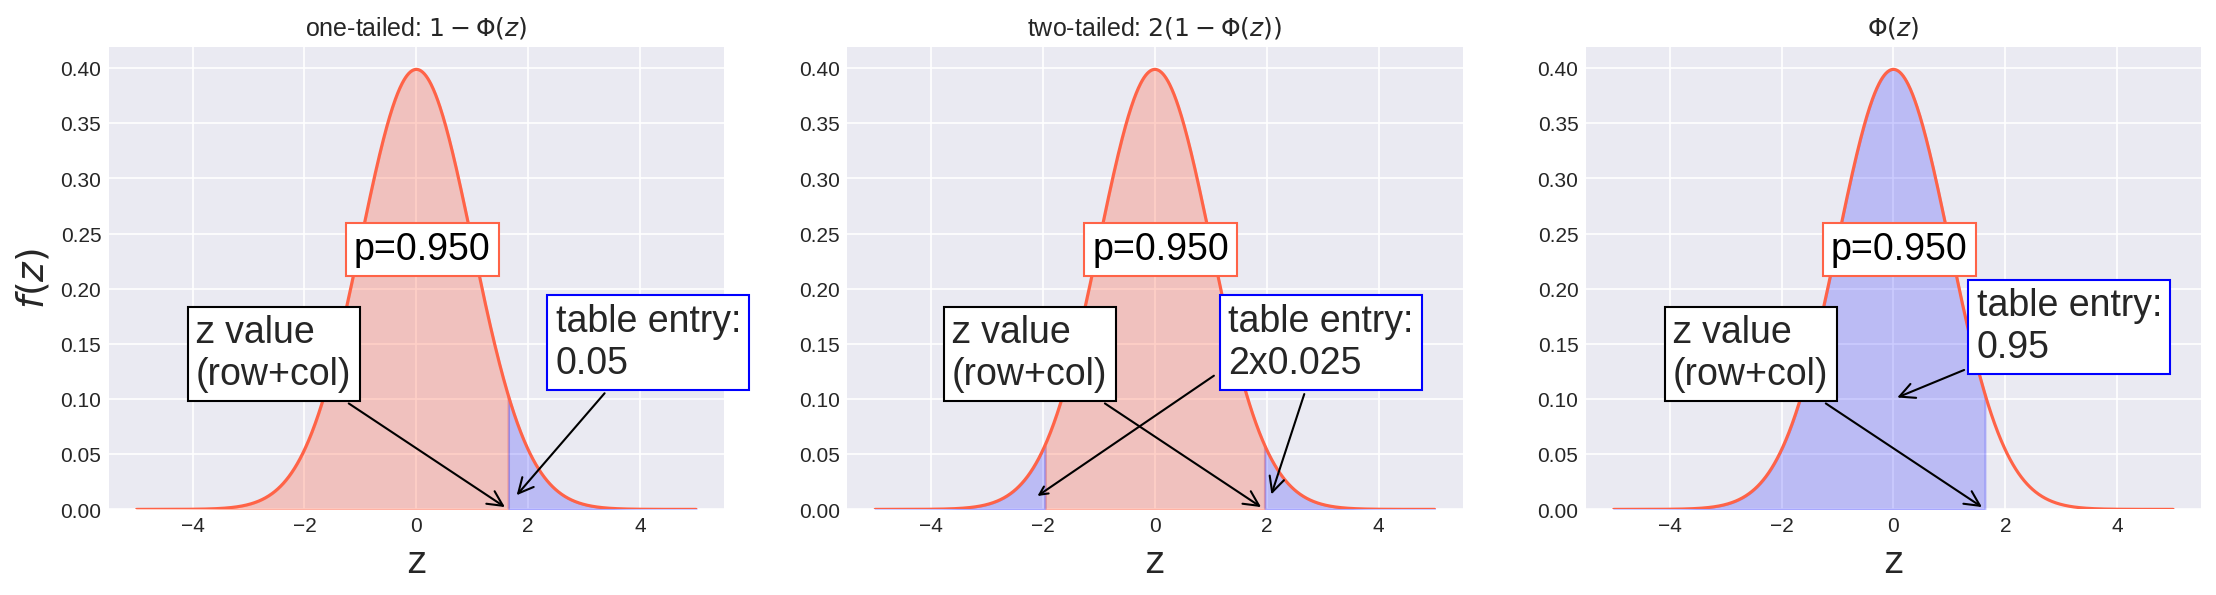

In [8]:
# Gaussian distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 4), dpi=150) 
x = np.linspace(-5, 5, num=1000)
pdf = stats.norm.pdf(x, 0, 1)


p1 = 0.95
pe = 1 - p1
cl = p1
q1 = stats.norm.ppf(p1, 0, 1)
axes[0].fill_between(x[(x<=q1)], 
                     pdf[(x<=q1)], 
                     color="tomato", alpha=0.3)
axes[0].fill_between(x[(x>=q1)], 
                     pdf[(x>=q1)], 
                     color="blue", alpha=0.2)
axes[0].annotate("p=%.3f"%cl, (0, 0), 
            xytext=(-30, 120), 
            textcoords="offset points", 
            color="k", fontsize=18, bbox=dict(edgecolor="tomato", facecolor="white"))
axes[0].annotate("z value\n(row+col)"%q1, (q1, 0), 
                 xytext=(-150, 60), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"}, fontsize=18, 
                 bbox=dict(edgecolor="k", facecolor="white"))
axes[0].annotate("table entry:\n%.2f"%(1-p1), (q1+0.1, 0.01), 
                 xytext=(20, 60), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"}, fontsize=18, 
                 bbox=dict(edgecolor="blue", facecolor="white"))

axes[0].plot(x, pdf, c="tomato")
axes[0].set_title("one-tailed: $1-\Phi(z)$")
axes[0].set_xlabel("z", fontsize=18);
axes[0].set_ylabel("$f(z)$", fontsize=18);
axes[0].set_ylim(0)

p0 = 0.025
p1 = 0.975
cl = 1-2*p0
q0 = stats.norm.ppf(p0, 0, 1)
q1 = stats.norm.ppf(p1, 0, 1)
axes[1].fill_between(x[(x<=q1) & (x>=q0)], pdf[(x<=q1) & (x>=q0)], 
                     color="tomato", alpha=0.3)
axes[1].fill_between(x[(x<=q0)], 
                    pdf[(x<=q0)], 
                    color="blue", alpha=0.2)
axes[1].fill_between(x[(x>=q1)], 
                    pdf[(x>=q1)], 
                    color="blue", alpha=0.2)

axes[1].annotate("p=%.3f"%cl, (0, 0), 
            xytext=(-30, 120), 
            textcoords="offset points", 
            color="k", fontsize=18, bbox=dict(edgecolor="tomato", facecolor="white"))

axes[1].annotate("z value\n(row+col)"%q1, (q1, 0), 
                 xytext=(-150, 60), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"}, fontsize=18, 
                 bbox=dict(edgecolor="k", facecolor="white"))
axes[1].annotate("table entry:\n2x%.3f"%(1-p1), (q1+0.1, 0.01), 
                 xytext=(-20, 60), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"}, fontsize=18, 
                 bbox=dict(edgecolor="blue", facecolor="white"))
axes[1].annotate("", (q0-0.2, 0.01), 
                 xytext=(88, 60), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"})
axes[1].plot(x, pdf, c="tomato")
axes[1].set_title("two-tailed: $2(1-\Phi(z))$")
axes[1].set_xlabel("z", fontsize=18);

axes[1].set_ylim(0);

p1 = 0.95
pe = 1 - p1
cl = p1
q1 = stats.norm.ppf(p1, 0, 1)

axes[2].fill_between(x[(x<=q1)], 
                     pdf[(x<=q1)], 
                     color="blue", alpha=0.2)
axes[2].annotate("p=%.3f"%cl, (0, 0), 
            xytext=(-30, 120), 
            textcoords="offset points", 
            color="k", fontsize=18, bbox=dict(edgecolor="tomato", facecolor="white"))
axes[2].annotate("z value\n(row+col)"%q1, (q1, 0), 
                 xytext=(-150, 60), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"}, fontsize=18, 
                 bbox=dict(edgecolor="k", facecolor="white"))
axes[2].annotate("table entry:\n%.2f"%(p1), (0, 0.1), 
                 xytext=(40, 20), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"}, fontsize=18, 
                 bbox=dict(edgecolor="blue", facecolor="white"))
axes[2].plot(x, pdf, c="tomato")
axes[2].set_title("$\Phi(z)$")
axes[2].set_xlabel("z", fontsize=18);
axes[2].set_ylim(0);



## Central limit theorem

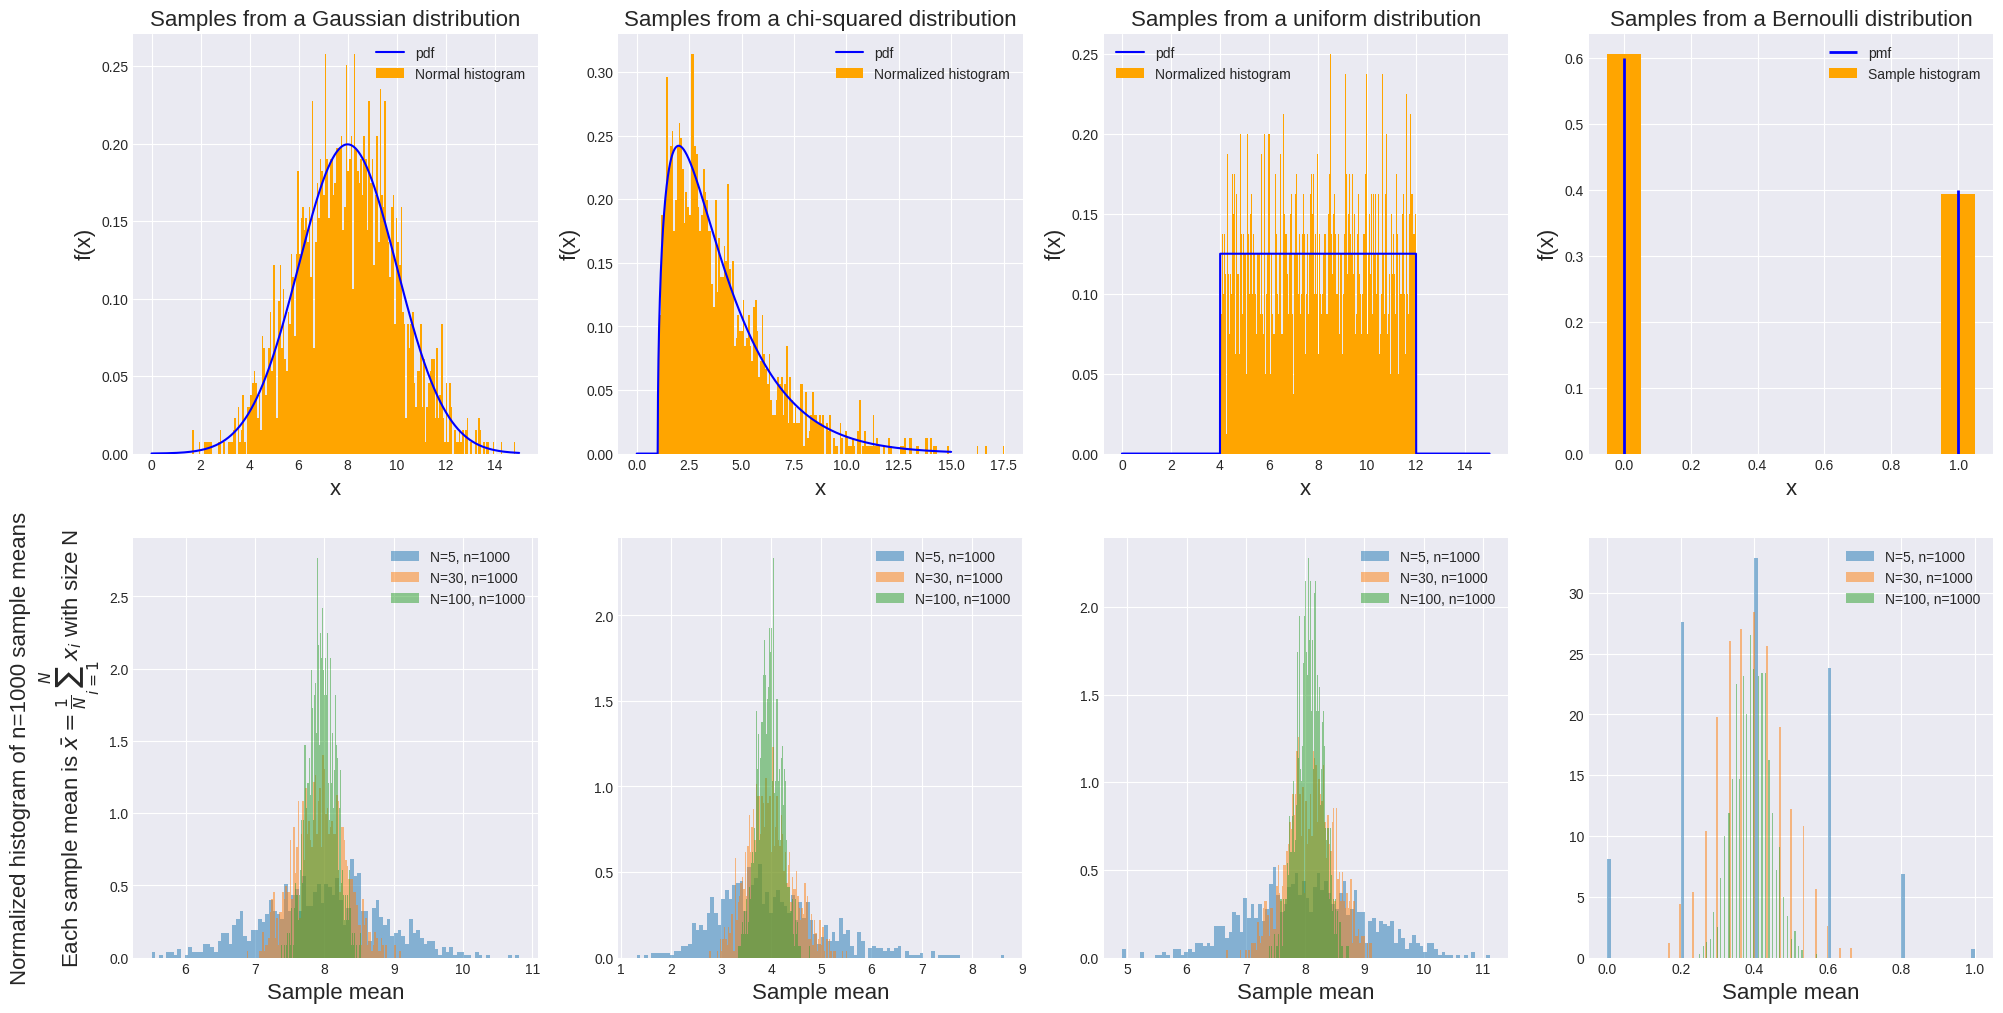

In [9]:
def get_standardized_sample_mean(data, N, n, replace=True):
    """
    $\bar{X}<-\sqrt{N}(\bar{X}-\hat{\mu})\sim N(0, \sigma^2)$
    N is each sample size
    n is the number of samples
    """
    means = []
    for i in range(n):
        means.append(math.sqrt(N)*(data[np.random.choice(data.shape[0], N, replace=replace)].mean()-data.mean()))
    return means

def get_sample_mean(data, N, n, replace=True):
    """
    N is each sample size
    n is the number of samples
    """
    means = []
    for i in range(n):
        means.append(data[np.random.choice(data.shape[0], N, replace=replace)].mean())
    return means

NN = 2000    
fig, axes = plt.subplots(2, 4, figsize=(24, 12), dpi=100) 
x = np.linspace(0, 15, num=NN)

normal = stats.norm.rvs(loc=8, scale=2, size=NN)
normal_pdf = stats.norm.pdf(x=x, loc=8, scale=2)
axes[0, 0].plot(x, normal_pdf, color="blue", label="pdf")
axes[0, 0].hist(normal, bins=200, density=True, label="Normal histogram", color="orange")
axes[0, 0].set_title("Samples from a Gaussian distribution", fontsize=16)
axes[0, 0].set_xlabel("x", fontsize=16)
axes[0, 0].set_ylabel("f(x)", fontsize=16)

df = 3
chi2 = stats.chi2.rvs(df=df, loc=1, scale=1, size=NN)
chi2_pdf = stats.chi2.pdf(x=x, df=df, loc=1, scale=1)
axes[0, 1].plot(x, chi2_pdf, color="blue", label="pdf")
axes[0, 1].hist(chi2, bins=200, density=True, label="Normalized histogram", color="orange")
axes[0, 1].set_title("Samples from a chi-squared distribution", fontsize=16)
axes[0, 1].set_xlabel("x", fontsize=16)
axes[0, 1].set_ylabel("f(x)", fontsize=16)

uniform = stats.uniform.rvs(loc=4, scale=8, size=NN)
uniform_pdf = stats.uniform.pdf(x=x, loc=4, scale=8)
axes[0, 2].plot(x, uniform_pdf, color="blue", label="pdf")
axes[0, 2].hist(uniform, bins=200, density=True, label="Normalized histogram", color="orange")
axes[0, 2].set_title("Samples from a uniform distribution", fontsize=16)
axes[0, 2].set_xlabel("x", fontsize=16)
axes[0, 2].set_ylabel("f(x)", fontsize=16)

p = 0.4
bern = stats.bernoulli.rvs(size=NN,p=p)

axes[0, 3].bar([0,1],[(bern==0).sum()/NN, (bern==1).sum()/NN], width=0.1, zorder=1, color="orange", label="Sample histogram"); 
axes[0, 3].vlines([0,1], 0, stats.bernoulli(p).pmf([0,1]), linestyles='-', lw=2, zorder=2, color="blue", label="pmf")
axes[0, 3].set_title("Samples from a Bernoulli distribution", fontsize=16)
axes[0, 3].set_xlabel("x", fontsize=16)
axes[0, 3].set_ylabel("f(x)", fontsize=16)

Ns = [5, 30, 100]
n = 1000
for N in Ns:
    axes[1, 0].hist(get_sample_mean(normal, N, n, replace=False), alpha=0.5, bins=100, density=True, label="N=%i, n=%i"%(N, n))
    axes[1, 1].hist(get_sample_mean(chi2, N, n, replace=False), alpha=0.5, bins=100, density=True, label="N=%i, n=%i"%(N, n))
    axes[1, 2].hist(get_sample_mean(uniform, N, n, replace=False), alpha=0.5, bins=100, density=True, label="N=%i, n=%i"%(N, n))
    axes[1, 3].hist(get_sample_mean(bern, N, n, replace=False), alpha=0.5, bins=100, density=True, label="N=%i, n=%i"%(N, n))
    
for j in range(4):    
    axes[1,j].set_xlabel(r"Sample mean", fontsize=16)
    for i in range(2): 
        axes[i,j].legend()

axes[1, 0].set_ylabel("Normalized histogram of n=%i sample means\nEach sample mean is "%n+r"$\bar{x}=\frac{1}{N}\sum_{i=1}^N x_i$ with size N", fontsize=16);


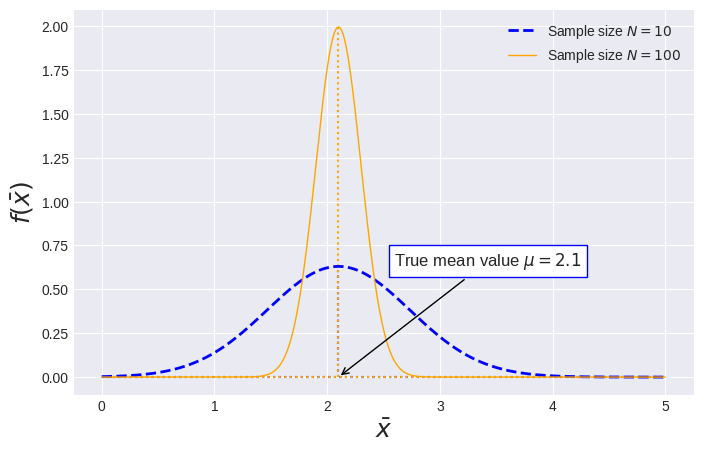

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), dpi=100) 
xmin = 0
xmax = 5
N1 = 10
N2 = 100
mu = 2.1
std = 2
x = np.linspace(xmin, xmax, 1000)
pdf1 = stats.norm.pdf(x=x, loc=mu, scale=math.sqrt(std*std/N1))
pdf2 = stats.norm.pdf(x=x, loc=mu, scale=math.sqrt(std*std/N2))
ax.set_xlabel(r"$\bar{x}$", fontsize=18)
ax.set_ylabel(r"$f(\bar{x})$", fontsize=18)
ax.vlines(x=mu, ymin=0, ymax=pdf1.max(), color="blue", linestyle="dotted")
ax.vlines(x=mu, ymin=0, ymax=pdf2.max(), color="orange", linestyle="dotted")
ax.hlines(y=0, xmin=xmin, xmax=xmax, color="blue", linestyle="dotted")
ax.hlines(y=0, xmin=xmin, xmax=xmax, color="orange", linestyle="dotted")
ax.annotate(r"True mean value $\mu=%.1f$"%mu, (mu, 0), 
            xytext=(40, 80), 
            textcoords="offset points", 
            arrowprops={"arrowstyle":"->"}, fontsize=12, 
            bbox=dict(edgecolor="blue", facecolor="white"))
ax.plot(x, pdf1, 
        label=r"Sample size $N=%i$"%(N1), 
        linestyle="--", linewidth=2, color="blue")
ax.plot(x, pdf2, 
        label=r"Sample size $N=%i$"%(N2), 
        linestyle="-", linewidth=1, color="orange")
ax.legend(loc="upper right");



## Confidence interval

95% confidence level: 2.2621571627409915


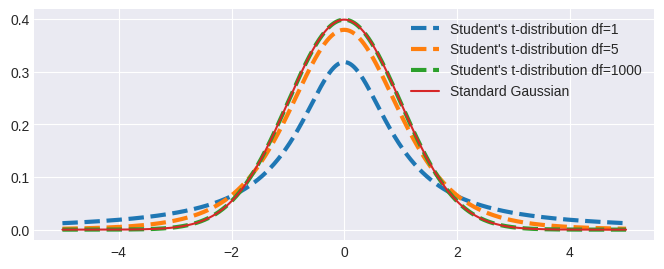

In [11]:
# student's t distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 3), dpi=100) 
x = np.linspace(-5, 5, 1000)
dfs = [1, 5, 1000]
tpdfs = []
for df in dfs:
    tpdf = stats.t.pdf(x=x, df=df)
    tpdfs.append(tpdf)
    ax.plot(x, tpdf, label="Student's t-distribution df=%i"%df, linestyle="--", linewidth=3)
zpdf = stats.norm.pdf(x=x, loc=0, scale=1)
ax.plot(x, zpdf, label="Standard Gaussian")
ax.legend(loc="upper right")

# t-table
N = 10
t = stats.t.ppf(q=0.975, df=N-1, loc=0, scale=1) # 0.95
print("95% confidence level:", t)


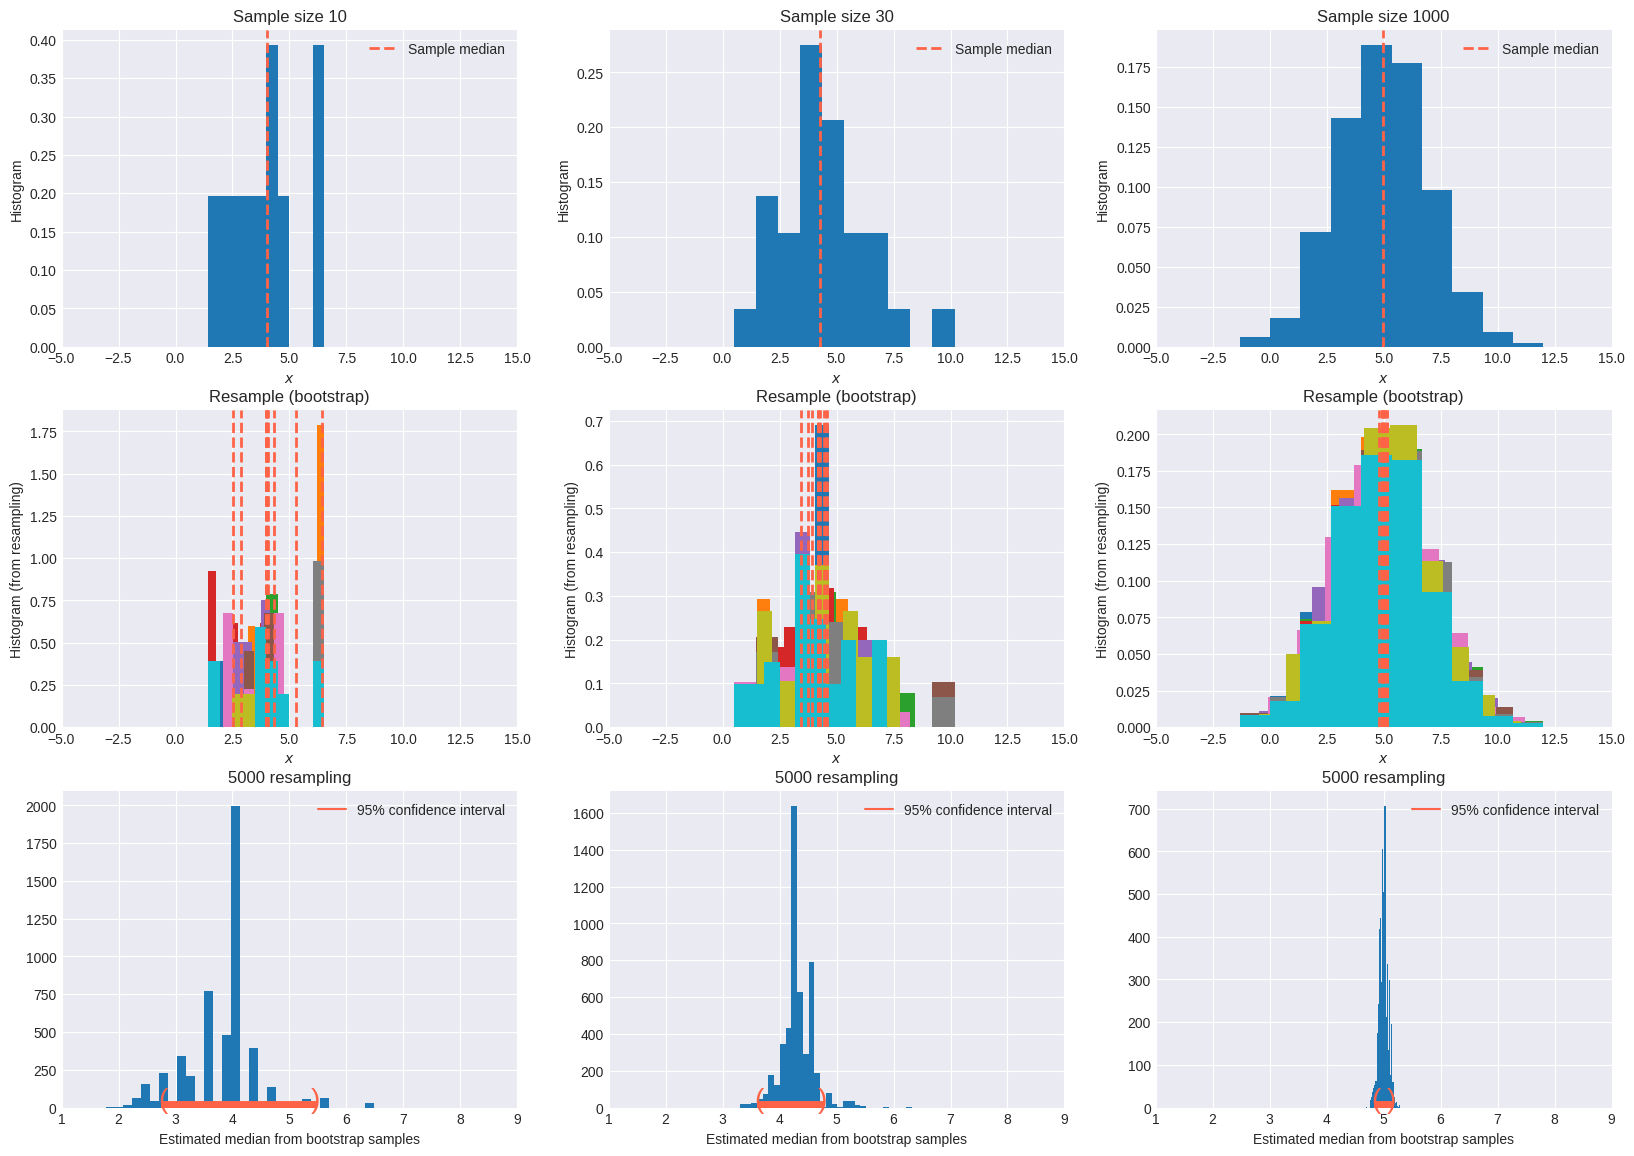

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(20, 14), dpi=100) 

# Bootstrap

def draw_sample_median(ax, x): 
    sample_size = x.size
    ax.hist(x, density=True)
    ax.axvline(np.median(x), ymin=0, ymax=1, linestyle="dashed", linewidth=2, color="tomato", label="Sample median")
    ax.set_ylabel("Histogram")
    ax.set_xlabel("$x$")
    ax.set_title("Sample size %i"%sample_size)
    ax.set_xlim(xmin, xmax)
    


xmin = -5
xmax = 15
mean = 5
std = 2

sample_sizes = [10, 30, 1000]
n_experiments = 5000 # large number

for i, sample_size in enumerate(sample_sizes):
    mus_mle = np.zeros((n_experiments, ))
    x = np.random.normal(loc=mean, scale=std, size=sample_size) # data generated from Gaussian; but we pretend that we don't know the distribution
    draw_sample_median(axes[0,i], x) # sample median
    axes[0, i].legend()
    sample_median = np.median(x)
    for j in range(10): # only plot the first 10 resampling
        xb = x[np.random.choice(x.shape[0], sample_size)] # resample with replacement
        mus_mle[j] = np.median(xb)
        draw_sample_median(axes[1,i], xb)
    
    for j in range(10, n_experiments):
        xb = x[np.random.choice(x.shape[0], sample_size)] # resample with replacement
        mus_mle[j] = np.median(xb)
    axes[1,i].set_xlabel("$x$")
    axes[1,i].set_title("Resample (bootstrap)")
    axes[1,i].set_ylabel("Histogram (from resampling)")
    
    axes[2,i].hist(mus_mle, bins=30)
    alpha = 0.05
    confidence = 1-alpha 
    error = mus_mle - sample_median 
    ci = (sample_median-np.quantile(error, 1-alpha/2), 
          sample_median-np.quantile(error, alpha/2))  

    # only for annotations 
    axes[2,i].annotate("(", xy=(ci[0]-0.05, -0.02), size=20, color="tomato")
    axes[2,i].annotate(")", xy=(ci[1]-0.1, -0.02), size=20, color="tomato") 
    axes[2,i].hlines(0, xmin=ci[0], xmax=ci[1], linewidth=10, color="tomato")
    axes[2,i].set_xlabel("Estimated median from bootstrap samples")
    axes[2,i].set_title("%i resampling"%n_experiments)
    axes[2,i].set_xlim(1, 9)
    axes[2,i].plot(0,0,label="95% confidence interval", color="tomato")
    axes[2,i].legend()
    


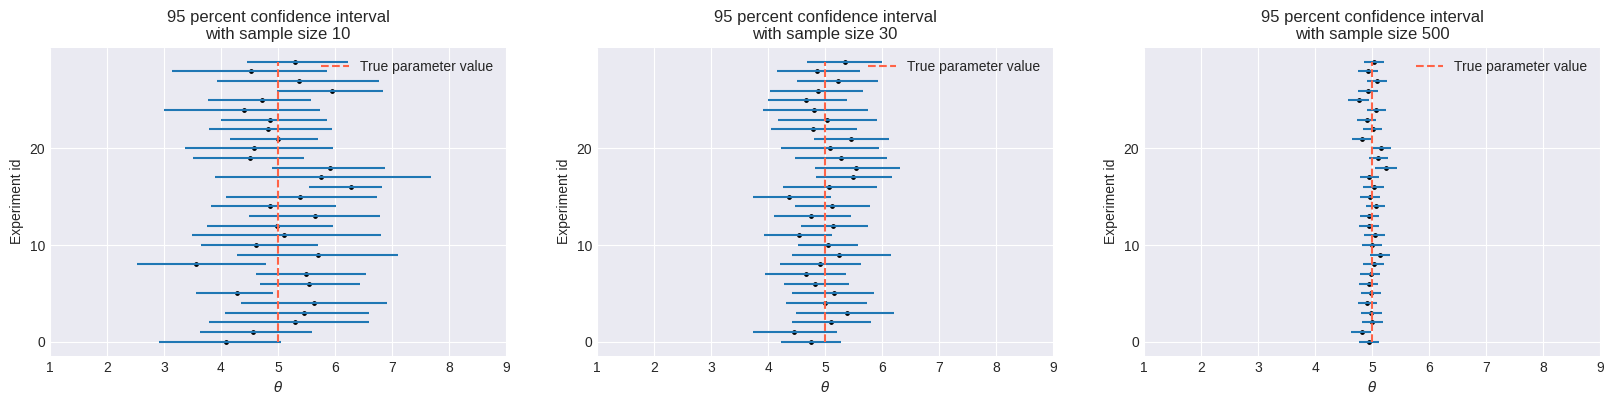

In [13]:
# Demonstrate the width of the interval with respect to the sample size 
# This is done by bootstrap to show that bootstrap can be time consuming
fig, axes = plt.subplots(1, 3, figsize=(20, 4), dpi=100) 


xmin = -5
xmax = 15
mean = 5
std = 2

sample_sizes = [10, 30, 500]
n_experiments = 1000 # large number. Reduce it if too slow
n_bootstrap = 30

for i, sample_size in enumerate(sample_sizes):
    for i_bootstrap in range(n_bootstrap):
        mus_mle = []
        x = np.random.normal(loc=mean, scale=std, size=sample_size)
        sample_mean = x.mean()

        for j in range(0, n_experiments):
            xb = x[np.random.choice(x.shape[0], sample_size)] # resample with replacement
            mus_mle.append(xb.mean())
    
        confidence = 0.95
        alpha = 1-confidence 
        error = np.asarray(mus_mle) - sample_mean 
        ci = (sample_mean-np.quantile(error, 1-alpha/2), 
              sample_mean-np.quantile(error, alpha/2))  

        axes[i].hlines(i_bootstrap, xmin=ci[0], xmax=ci[1])
        axes[i].scatter(sample_mean, i_bootstrap, color="k", s=6)
    axes[i].vlines(mean, ymin=0, ymax=n_bootstrap-1, color="tomato", linestyle="dashed", label="True parameter value")
    axes[i].set_yticks(range(0, n_bootstrap, 10))
    axes[i].set_xlim(1, 9)
    axes[i].set_title("95 percent confidence interval\nwith sample size %i"%sample_size)
    axes[i].legend()
    axes[i].set_xlabel(r"$\theta$")
    axes[i].set_ylabel("Experiment id")

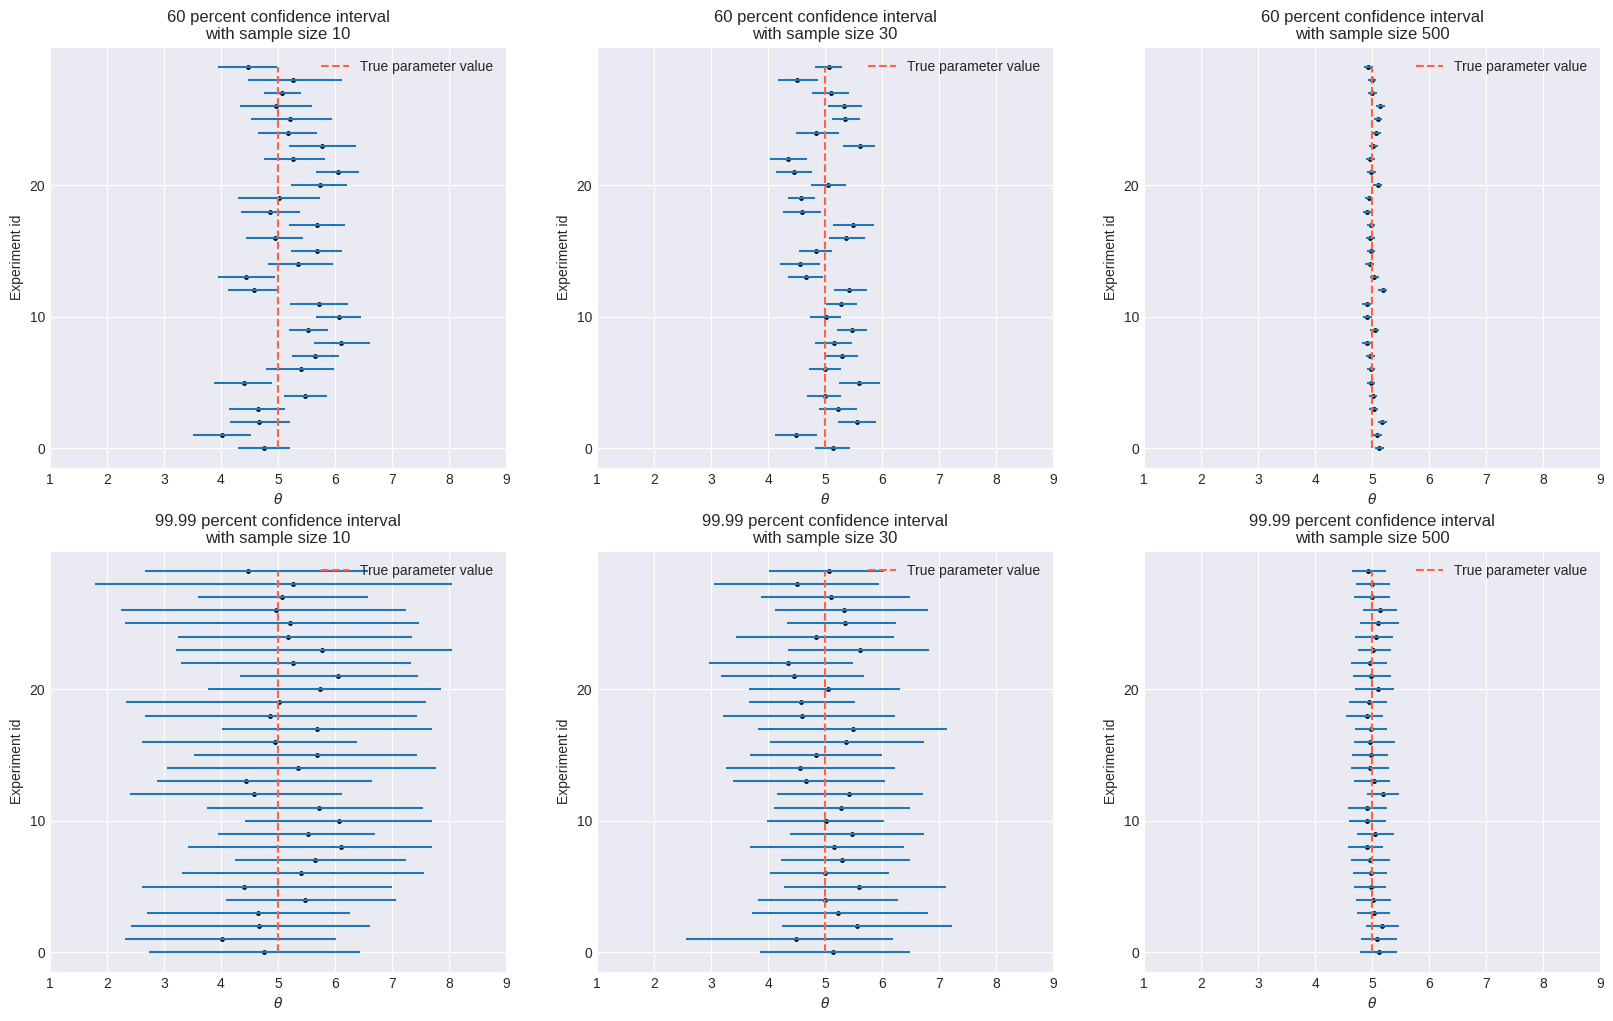

In [14]:
# Demonstrate the width of the interval given different confidence level using bootstrap

fig, axes = plt.subplots(2, 3, figsize=(20, 12), dpi=100) 


xmin = -5
xmax = 15
mean = 5
std = 2

sample_sizes = [10, 30, 500]
n_experiments = 3000 # large number. Reduce it if too slow
n_bootstrap = 30

for i, sample_size in enumerate(sample_sizes):
    for i_bootstrap in range(n_bootstrap):
        mus_mle = []
        x = np.random.normal(loc=mean, scale=std, size=sample_size)
        sample_mean = x.mean()

        for j in range(0, n_experiments):
            xb = x[np.random.choice(x.shape[0], sample_size)] # resample with replacement
            mus_mle.append(xb.mean())
        
        # Estimating 60% confidence interval
        confidence = 0.6
        alpha = 1-confidence 
        error = np.asarray(mus_mle) - sample_mean 
        ci = (sample_mean-np.quantile(error, 1-alpha/2), 
              sample_mean-np.quantile(error, alpha/2))  

        axes[0, i].hlines(i_bootstrap, xmin=ci[0], xmax=ci[1])
        axes[0, i].scatter(sample_mean, i_bootstrap, color="k", s=6)
        
        # Estimating 99.99% confidence interval
        confidence = 0.9999
        alpha = 1-confidence 
        error = np.asarray(mus_mle) - sample_mean 
        ci = (sample_mean-np.quantile(error, 1-alpha/2), 
              sample_mean-np.quantile(error, alpha/2))  

        axes[1, i].hlines(i_bootstrap, xmin=ci[0], xmax=ci[1])
        axes[1, i].scatter(sample_mean, i_bootstrap, color="k", s=6)
        
        
    axes[0, i].vlines(mean, ymin=0, ymax=n_bootstrap-1, color="tomato", linestyle="dashed", label="True parameter value")
    axes[0, i].set_yticks(range(0, n_bootstrap, 10))
    axes[0, i].set_xlim(1, 9)
    axes[0, i].set_title("60 percent confidence interval\nwith sample size %i"%sample_size)
    axes[0, i].legend()
    axes[0, i].set_xlabel(r"$\theta$")
    axes[0, i].set_ylabel("Experiment id")
    
    axes[1, i].vlines(mean, ymin=0, ymax=n_bootstrap-1, color="tomato", linestyle="dashed", label="True parameter value")
    axes[1, i].set_yticks(range(0, n_bootstrap, 10))
    axes[1, i].set_xlim(1, 9)
    axes[1, i].set_title("99.99 percent confidence interval\nwith sample size %i"%sample_size)
    axes[1, i].legend()
    axes[1, i].set_xlabel(r"$\theta$")
    axes[1, i].set_ylabel("Experiment id")

## Credible interval

(-1.959963984540054, 1.959963984540054)


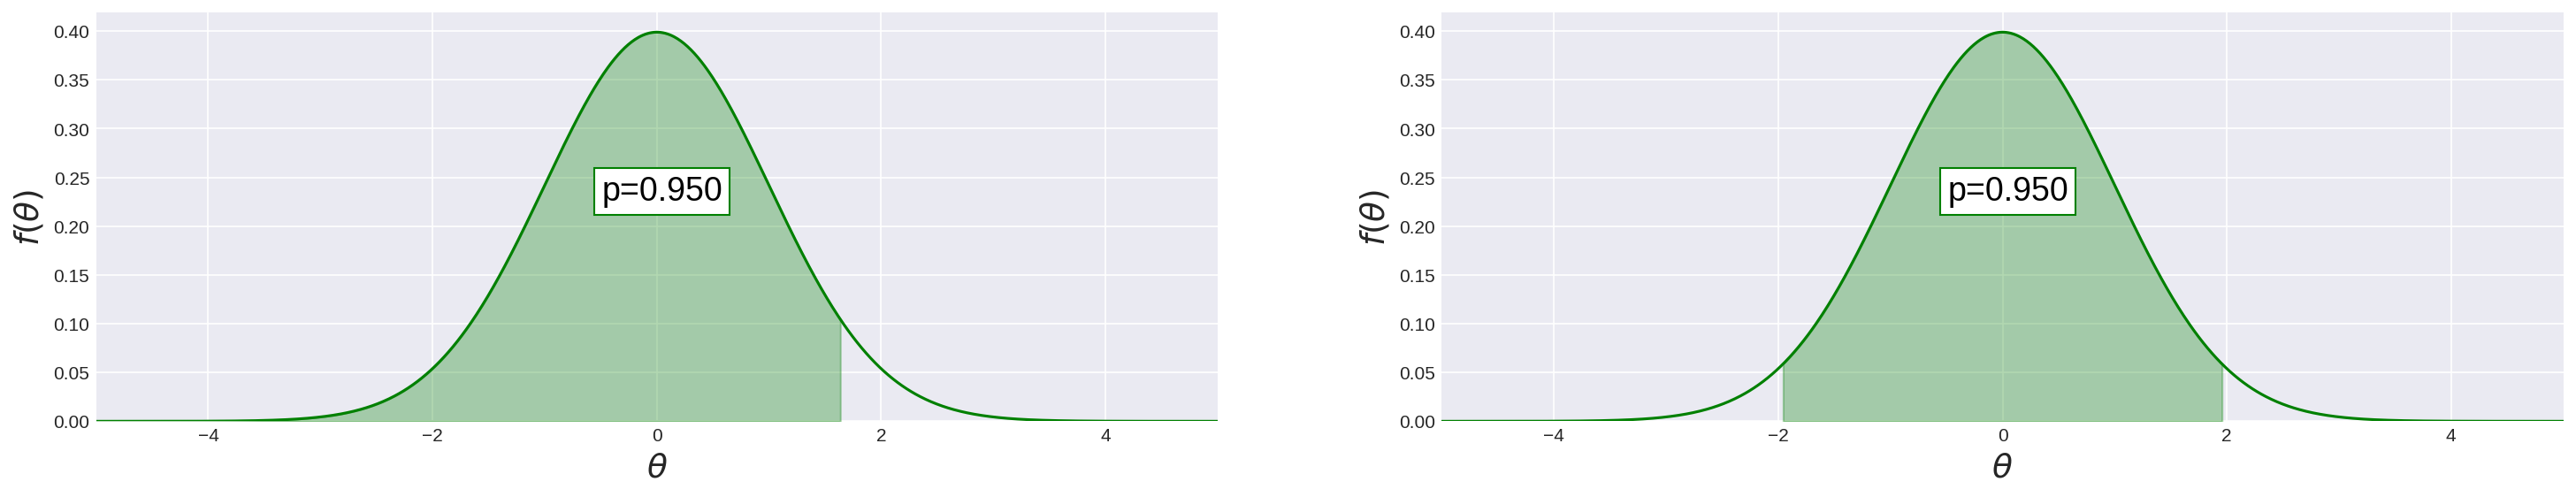

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(24, 4), dpi=150) 
xmin = -5
xmax = 5
x = np.linspace(-5, 5, num=1000)
pdf = stats.norm.pdf(x, 0, 1)


p1 = 0.95
pe = 1 - p1
cl = p1
q1 = stats.norm.ppf(p1, 0, 1)
axes[0].plot(x, pdf, c="green")
axes[0].fill_between(x[(x<=q1)], 
                     pdf[(x<=q1)], 
                     color="green", alpha=0.3)
axes[0].annotate("p=%.3f"%cl, (0, 0), 
            xytext=(-30, 120), 
            textcoords="offset points", 
            color="k", fontsize=18, bbox=dict(edgecolor="green", facecolor="white"))
axes[0].set_xlabel(r"$\theta$", fontsize=18);
axes[0].set_ylabel(r"$f(\theta)$", fontsize=18);
axes[0].set_ylim(0)
axes[0].set_xlim(xmin, xmax)

p0 = 0.025
p1 = 0.975
cl = 1-2*p0
q0 = stats.norm.ppf(p0, 0, 1)
q1 = stats.norm.ppf(p1, 0, 1)
axes[1].fill_between(x[(x<=q1) & (x>=q0)], pdf[(x<=q1) & (x>=q0)], 
                     color="green", alpha=0.3)

axes[1].annotate("p=%.3f"%cl, (0, 0), 
            xytext=(-30, 120), 
            textcoords="offset points", 
            color="k", fontsize=18, bbox=dict(edgecolor="green", 
                                              facecolor="white"))


axes[1].plot(x, pdf, c="green")
axes[1].set_xlabel(r"$\theta$", fontsize=18)
axes[1].set_xlim(xmin, xmax)
axes[1].set_ylabel(r"$f(\theta)$", fontsize=18)
axes[1].set_ylim(0);

print(stats.norm(loc=0, scale=1).interval(0.95))